# Physionet ECG 

## Bibliography
- WFDB github: https://github.com/MIT-LCP/wfdb-python
- WFDB jupyter demo: https://github.com/MIT-LCP/wfdb-python/blob/master/demo.ipynb
- Physionet Database: https://physionet.org/pn3/ecgiddb/
- Paper - Physionet - Biometric Human Identification based on ECG: https://physionet.org/pn3/ecgiddb/biometric.shtml
- Paper - Recognition of ECG Patterns Using Artificial Neural Network: https://ieeexplore.ieee.org/abstract/document/4021710
- Paper - Enhancement of low sampling frequency recordings for ECG biometric matching using interpolation: https://www.sciencedirect.com/science/article/pii/S016926071200212X

In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil

import wfdb

import pandas as pd

In [2]:
PERSON = '../data/Person_01/rec_10'
SAMPTO = 10000

In [3]:
# Read the record
record = wfdb.rdrecord(PERSON, sampto=SAMPTO)

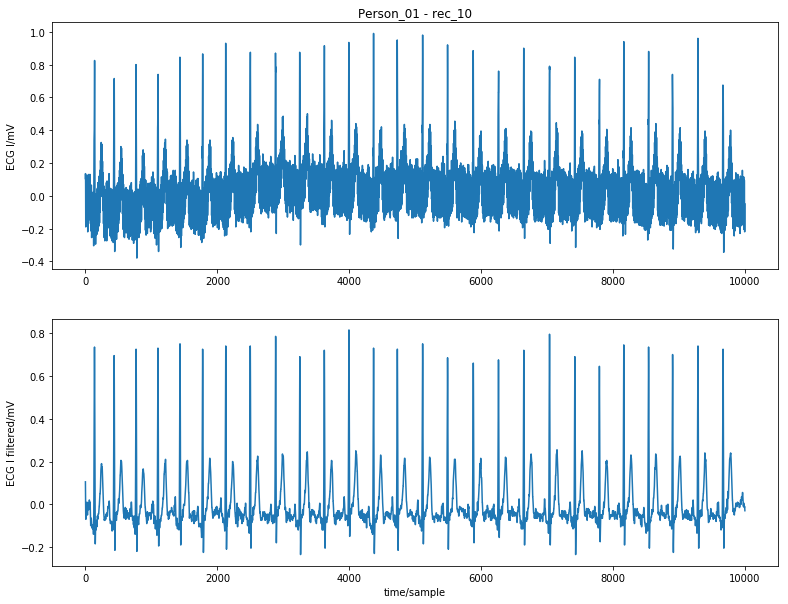

In [4]:
# Plot all the channels
wfdb.plot_wfdb(record=record, title='Person_01 - rec_10', figsize=(13,10))

In [5]:
# Returns the signals that is the channels reading and the fields that is a header with some informations about
# the ECG and the patient 
signals, fields = wfdb.rdsamp(PERSON, channels=[0,1], sampfrom=100, sampto=SAMPTO)
display(signals)
display(fields)

array([[ 0.02 , -0.105],
       [-0.01 , -0.105],
       [-0.04 , -0.1  ],
       ...,
       [-0.175, -0.015],
       [-0.165, -0.02 ],
       [-0.05 , -0.03 ]])

{'fs': 500,
 'sig_len': 9900,
 'n_sig': 2,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV'],
 'sig_name': ['ECG I', 'ECG I filtered'],
 'comments': ['Age: 25', 'Sex: male', 'ECG date: 15.03.2005']}

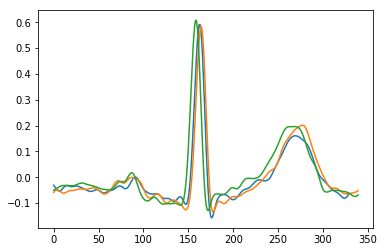

In [6]:
df = pd.DataFrame(signals)
# Apply a moving average to smooth the signal
df2 = df.rolling(10).mean()
# Size of a "record" 340
# Comparisson between three different "records"
df2[1][510:840].reset_index()[1].plot()
df2[1][840:1180].reset_index()[1].plot()
df2[1][1180:1520].reset_index()[1].plot()

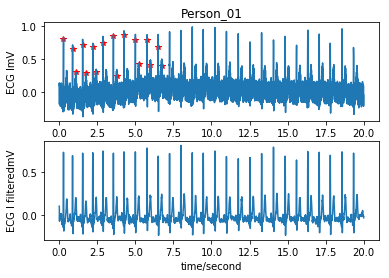

In [8]:
# Read a WFDB record and annotation. Plot all channels, and the annotation on top of channel 0.
record = wfdb.rdrecord('../data/Person_01/rec_10', sampto = 10000)
annotation = wfdb.rdann('../data/Person_01/rec_10', 'atr', sampto = 10000)

wfdb.plot_wfdb(record=record, annotation=annotation,
               title='Person_01',
               time_units='seconds')

In [ ]:
# TODO:
    
#     1- Test some filter on the data to reduce the noise
#     1- Identify PQRST points on ECG wave (https://physionet.org/pn3/ecgiddb/biometric.shtml).
#     2- Identify time R-R (https://ieeexplore.ieee.org/abstract/document/4021710)